In [2]:
# imports
import cv2
import matplotlib.pyplot as plt

Largura em pixels: 512
Altura em pixels: 512
Quantidade de canais: 3


True

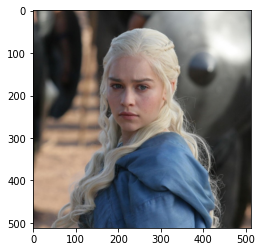

In [3]:
# leitura de uma imagem
imagem = cv2.imread('img/dany.png')

# dimensoes da imagem
print('Largura em pixels: ', end='')
print(imagem.shape[1])
print('Altura em pixels: ', end='')
print(imagem.shape[0])
print('Quantidade de canais: ', end='')
print(imagem.shape[2])

# mostra a imagem com a funcao imshow
# cv2.imshow('Nome da janela', imagem)
# cv2.waitKey(0) # esperando pressionar alguma tecla
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

# salvar a imagem
cv2.imwrite('saida.jpg', imagem)

A imagem tem 3 canais: 3 dimensões, cada uma contendo uma das 3 cores do padrão RGB.

* Branco: RGB(255,255,255)
* Azul: RGB(0,0,255)
* Vermelho: RGB(255,0,0)
* Verde: RGB(0,255,0)
* Amarelo: RGB(255,255,0)
* Magenta: RGB(255,0,255)
* Ciano: RGB(0,255,255)
* Preto: RGB(0,0,0)

É possível representar 16.7 milhões de cores.

É utilizado o sistema de coordenadas (linha, coluna), começando de (0,0).

In [4]:
imagem = cv2.imread('img/ponte.png')
# é possível obter e alterar o valor de um pixel
(b,g,r) = imagem[0,0] # a ordem utilizada pelo opencv é bgr, não rgb

O pixel (0,0) tem as seguintes cores: 
Vermelho: 255 Verde: 255 Azul: 255


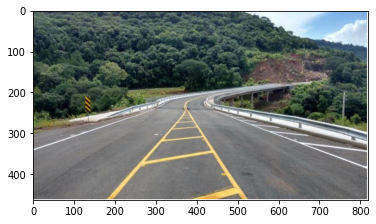

In [5]:
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
print('O pixel (0,0) tem as seguintes cores: ')
print('Vermelho:', r, 'Verde:', g, 'Azul:', b)

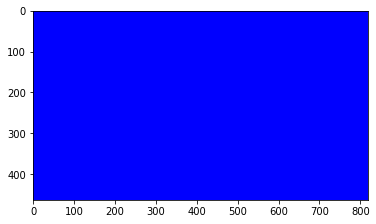

In [6]:
# também dá pra varrer uma imagem utilizando dois laços
# porém isso pode não ser muito eficiente
for y in range(0, imagem.shape[0]):     # linhas (altura)
    for x in range(0, imagem.shape[1]): # colunas (largura)
        imagem[y, x] = (255,0,0)
# cv2.imshow('Imagem modificada', imagem)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

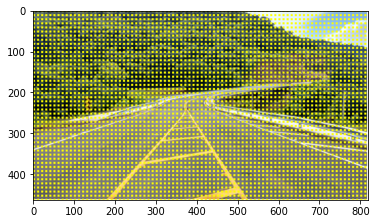

In [7]:
# saltando de 10 em 10 pixels e fazendo um 
# quadrado amarelo 5x5 em cada salto.
imagem = cv2.imread('img/ponte.png')
for y in range(0, imagem.shape[0], 10): 
    for x in range(0, imagem.shape[1], 10):
        imagem[y:y+5, x:x+5] = (0, 255, 255)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

## Cortando uma imagem / Crop 

True

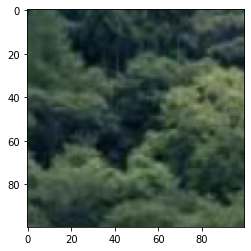

In [8]:
imagem = cv2.imread('img/ponte.png')
recorte = imagem[100:200, 100:200] # o intervalo que eu desejo da imagem
plt.imshow(cv2.cvtColor(recorte, cv2.COLOR_BGR2RGB))
cv2.imwrite('recorte.jpg', recorte)